In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Harvard_preprocessed.csv')

In [4]:
df.head()

,course_id,userid_DI,viewed,explored,certified,nevents,ndays_act,nchapters,nforum_posts,Age,LoE_DI_labels,gender_labels,grade
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,0,0,0,1.0,9.0,1.0,0,22.0,0,1,0.00
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,0,0,0,1.0,16.0,1.0,0,23.0,0,1,0.00
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,0,0,42.0,6.0,3.0,0,23.0,0,1,0.00
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,0,0,70.0,3.0,3.0,0,23.0,0,1,0.00
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,0,0,175.0,9.0,7.0,0,23.0,0,1,0.07


In [5]:
c=df.pop('grade')
df['grade']=c

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309638 entries, 0 to 309637
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   course_id      309638 non-null  object 
 1   userid_DI      309638 non-null  object 
 2   viewed         309638 non-null  int64  
 3   explored       309638 non-null  int64  
 4   certified      309638 non-null  int64  
 5   nevents        309638 non-null  float64
 6   ndays_act      309638 non-null  float64
 7   nchapters      309638 non-null  float64
 8   nforum_posts   309638 non-null  int64  
 9   Age            309638 non-null  float64
 10  LoE_DI_labels  309638 non-null  int64  
 11  gender_labels  309638 non-null  int64  
 12  grade          309638 non-null  float64
dtypes: float64(5), int64(6), object(2)
memory usage: 30.7+ MB


In [7]:
df = df.drop(['course_id','userid_DI'],axis = 1)
df.head()

,viewed,explored,certified,nevents,ndays_act,nchapters,nforum_posts,Age,LoE_DI_labels,gender_labels,grade
0,0,0,0,1.0,9.0,1.0,0,22.0,0,1,0.00
1,0,0,0,1.0,16.0,1.0,0,23.0,0,1,0.00
2,1,0,0,42.0,6.0,3.0,0,23.0,0,1,0.00
3,1,0,0,70.0,3.0,3.0,0,23.0,0,1,0.00
4,1,0,0,175.0,9.0,7.0,0,23.0,0,1,0.07


In [8]:
#Identify input and target columns
input_cols,target_cols=df.columns[:-1],df.columns[-1]
input_df,targets=df[input_cols].copy(),df[target_cols].copy()

In [9]:
cols1=input_df.columns[:9]

In [10]:
scaler=MinMaxScaler().fit(input_df[cols1])
input_df[cols1]=scaler.transform(input_df[cols1])

In [11]:
input_df.head()

,viewed,explored,certified,nevents,ndays_act,nchapters,nforum_posts,Age,LoE_DI_labels,gender_labels
0,0.0,0.0,0.0,0.000000,0.045714,0.000000,0.0,0.268293,0.0,1
1,0.0,0.0,0.0,0.000000,0.085714,0.000000,0.0,0.280488,0.0,1
2,1.0,0.0,0.0,0.000934,0.028571,0.060606,0.0,0.280488,0.0,1
3,1.0,0.0,0.0,0.001573,0.011429,0.060606,0.0,0.280488,0.0,1
4,1.0,0.0,0.0,0.003965,0.045714,0.181818,0.0,0.280488,0.0,1


In [12]:
cols2=input_df.columns[9:]

In [13]:
#input_df[cols2]

In [13]:
#For categorical columns
one_hot_encoded_data = pd.get_dummies(input_df, columns = ['LoE_DI_labels', 'gender_labels'])
print(one_hot_encoded_data)

        viewed  explored  certified   nevents  ndays_act  nchapters  \
0          0.0       0.0        0.0  0.000000   0.045714   0.000000   
1          0.0       0.0        0.0  0.000000   0.085714   0.000000   
2          1.0       0.0        0.0  0.000934   0.028571   0.060606   
3          1.0       0.0        0.0  0.001573   0.011429   0.060606   
4          1.0       0.0        0.0  0.003965   0.045714   0.181818   
...        ...       ...        ...       ...        ...        ...   
309633     1.0       0.0        0.0  0.000433   0.000000   0.030303   
309634     1.0       0.0        0.0  0.001709   0.000000   0.030303   
309635     0.0       0.0        0.0  0.000023   0.000000   0.000000   
309636     1.0       0.0        0.0  0.000820   0.011429   0.000000   
309637     0.0       0.0        0.0  0.000000   0.000000   0.000000   

        nforum_posts       Age  LoE_DI_labels_0.0  LoE_DI_labels_0.25  \
0                0.0  0.268293                  1                   0   
1

In [14]:
input_df = one_hot_encoded_data

In [15]:
input_df.shape

(309638, 16)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(input_df,targets,test_size=0.25,random_state=42)

In [17]:
X_train.head()

,viewed,explored,certified,nevents,ndays_act,nchapters,nforum_posts,Age,LoE_DI_labels_0.0,LoE_DI_labels_0.25,LoE_DI_labels_0.5,LoE_DI_labels_0.75,LoE_DI_labels_1.0,gender_labels_0,gender_labels_1,gender_labels_2
172467,1.0,0.0,0.0,0.000046,0.000000,0.000000,0.0,0.182927,0,0,1,0,0,0,1,0
296743,1.0,0.0,0.0,0.006609,0.011429,0.030303,0.0,0.292683,1,0,0,0,0,1,0,0
289027,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.304878,1,0,0,0,0,0,1,0
44842,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.378049,1,0,0,0,0,0,1,0
256339,1.0,1.0,0.0,0.086146,0.222857,0.424242,0.0,0.353659,1,0,0,0,0,1,0,0


In [18]:
y_train.head()

172467    0.00
296743    0.02
289027    0.00
44842     0.00
256339    0.45
Name: grade, dtype: float64

The first model we are implementing is the Linear regression model. The easiest way to examine feature importances is by examining the model’s coefficients. 

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [32]:
importances

,Attribute,Importance
13,gender_labels_0,1.761515e+11
14,gender_labels_1,1.761515e+11
15,gender_labels_2,1.761515e+11
9,LoE_DI_labels_0.25,2.658431e+10
11,LoE_DI_labels_0.75,2.658431e+10
8,LoE_DI_labels_0.0,2.658431e+10
12,LoE_DI_labels_1.0,2.658431e+10
10,LoE_DI_labels_0.5,2.658431e+10
3,nevents,9.919981e-01
2,certified,7.406110e-01


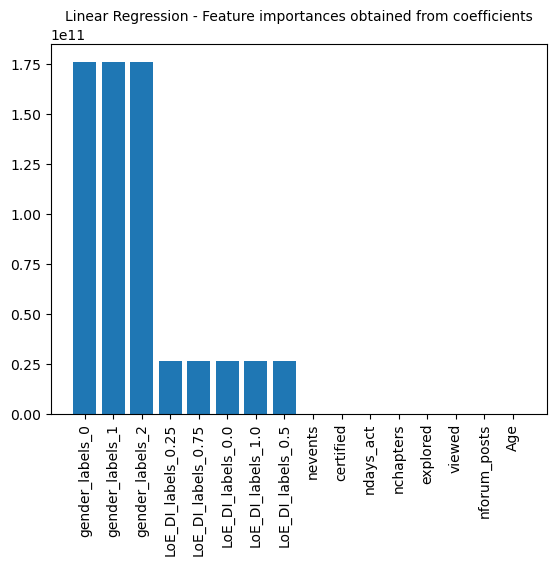

In [33]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Linear Regression - Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [23]:
importances

,Attribute,Importance
2,certified,0.958604
1,explored,0.015790
3,nevents,0.008875
5,nchapters,0.006100
4,ndays_act,0.001677
13,gender_labels_0,0.001570
7,Age,0.001517
12,LoE_DI_labels_1.0,0.001301
11,LoE_DI_labels_0.75,0.001138
9,LoE_DI_labels_0.25,0.001022


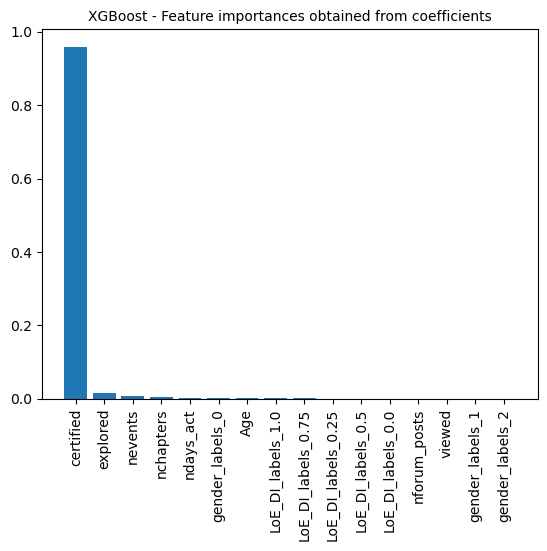

In [30]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('XGBoost - Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

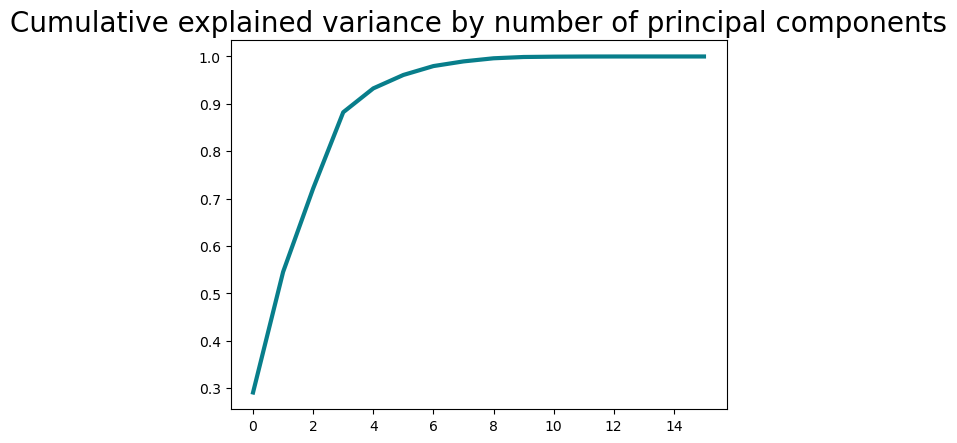

In [25]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [26]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
viewed,-0.060771,-0.059155,0.483205,-0.029414,-0.050728,-0.002171,-0.001097,0.000355,-0.000404,-0.001998,-0.000084,-0.000006,-0.000002,-3.241137e-07,-2.681292e-31,1.908078e-32
explored,-0.013364,-0.010608,0.077830,0.005029,0.226836,-0.001922,0.001206,-0.049358,-0.000915,-0.016843,-0.000556,0.000258,-0.000048,-9.732625e-07,-3.574874e-31,-3.439295e-31
certified,0.000933,-0.003190,0.027919,0.004854,0.091536,0.000073,0.000321,0.105488,0.000572,-0.016207,-0.003050,0.000132,-0.000186,5.139752e-08,-4.550904e-31,4.087342e-32
nevents,0.000678,-0.000160,0.003447,0.001091,0.007700,0.000230,-0.000522,0.004113,-0.000078,0.000653,0.007241,0.000062,0.011116,2.385989e-06,5.329180e-30,6.695647e-30
ndays_act,0.000452,-0.000740,0.011600,0.002654,0.023894,0.000547,-0.001085,0.010825,0.000872,0.005597,0.029624,-0.001206,-0.002715,1.104163e-06,1.598029e-30,-4.518876e-31


Three different techniques were used to determine feature importance. With linear regression we found that demographic elements like gender and Level of education play a role in determining the final grades received. However, the tree based technique called XGBoost suggests that student engagement related features like whether student explored the course content or not, chapters viewed etc. also play a role. The most significant feature was found to be 'certified' which stands for - anyone
who earned a certificate. This makes sense because those who did not receive certificates most likely did not continue the course.Finally PCA shows that engagement related features like viewed, explored and interactions with the course (nevents) explain most of the variation in the data. By combining the results we obtained for this dataset,we can conclude that student engagement contributes more to student grade outcomes than demographics in general.